# TensorFlow and Keras

In [29]:
#Uncomment and use it
#!pip install tensorflow

In [30]:
#!pip install matplotlib

In [31]:
import tensorflow as tf
%matplotlib inline  

## Tensors

#### Constants

tf.constant creates constant values, these values do not change
or update during optimization process(training phase)

In [32]:
a = tf.constant([50,10])
print(a)

tf.Tensor([50 10], shape=(2,), dtype=int32)


Few things that we can do with the tensors at the runtime:
1. Directly get a numpy value of the tensor
2. dtype : data type of the tensor(int16/int32/float32/float64)
3. shape: shape of the tensor

In [33]:
print('a in tensorflow ==>', a)
print('numpy value of a ==>', a.numpy())
print('dtype of a ==>', a.dtype)
print('shape of a ==>', a.shape)

a in tensorflow ==> tf.Tensor([50 10], shape=(2,), dtype=int32)
numpy value of a ==> [50 10]
dtype of a ==> <dtype: 'int32'>
shape of a ==> (2,)


We can use inbuild tf.XX() function to create constant tensors, just like numpy.

In [34]:
print('Tensor of Ones: \n',tf.ones(shape=(2, 2)))
print('Tensor of Zeros: \n',tf.zeros(shape=(2, 2)))
print('Random normal values \n', tf.random.normal(shape=(3, 2),
                                                  mean=5, 
                                                  stddev=1))

Tensor of Ones: 
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
Tensor of Zeros: 
 tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)
Random normal values 
 tf.Tensor(
[[4.8347564 4.626671 ]
 [6.6519356 5.885743 ]
 [4.695631  5.8173842]], shape=(3, 2), dtype=float32)


### Variables

We generally create a variable with some values, call it initialized values, 
convert this constant tensor into a variable and then mutate the variable by using special functions.

In [35]:
x = tf.Variable(5) # Simple variable
print(x)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>


In [36]:
#randomly initialized variable, like we need for our weights
w = tf.Variable(tf.random.normal(shape=(2, 2))) 
print(w)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.16839702,  0.8431764 ],
       [-1.5381277 , -1.0391735 ]], dtype=float32)>


In [37]:
m = tf.Variable(5) # Simple variable
print(m)

m = tf.Variable(5) 
print('New value', m.assign(2))

m = tf.Variable(5) 
print('increment by 1', m.assign_add(1))

m = tf.Variable(5) 
print('Decrement by 2', m.assign_sub(2))


<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=5>
New value <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=2>
increment by 1 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=6>
Decrement by 2 <tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>


### Regression Model building in TensorFlow

#This step is for data creation, x and y

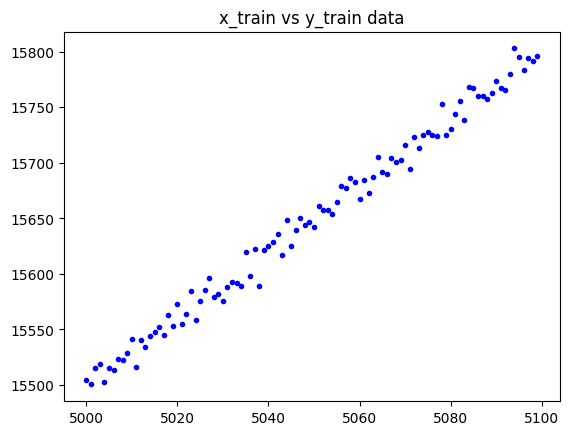

In [44]:
#This step is for data creation, x and y
import numpy as np
x_train= np.array(range(5000,5100)).reshape(-1,1)


y_train=[3*i+np.random.normal(500, 10) for i in x_train]

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.')
plt.show()

In [45]:
#Model y=X*W + b
#Model function
def output(x):
    return W*x + b

#Loss function Reduce mean square
def loss_function(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  200106816.0,  W : [[0.4403422]], b  [1.0000283]
epoch : 1, loss  180217712.0,  W : [[0.57591856]], b  [1.0000551]
epoch : 2, loss  162305440.0,  W : [[0.704581]], b  [1.0000806]
epoch : 3, loss  146173504.0,  W : [[0.82668215]], b  [1.0001048]
epoch : 4, loss  131644960.0,  W : [[0.94255656]], b  [1.0001277]
epoch : 5, loss  118560448.0,  W : [[1.0525217]], b  [1.0001495]
epoch : 6, loss  106776456.0,  W : [[1.1568791]], b  [1.0001701]
epoch : 7, loss  96163688.0,  W : [[1.2559146]], b  [1.0001898]
epoch : 8, loss  86605744.0,  W : [[1.3498995]], b  [1.0002084]
epoch : 9, loss  77997792.0,  W : [[1.4390917]], b  [1.000226]
epoch : 10, loss  70245408.0,  W : [[1.5237353]], b  [1.0002428]
epoch : 11, loss  63263548.0,  W : [[1.6040623]], b  [1.0002587]
epoch : 12, loss  56975636.0,  W : [[1.680293]], b  [1.0002738]
epoch : 13, loss  51312700.0,  W : [[1.7526361]], b  [1.0002881]
epoch : 14, loss  46212620.0,  W : [[1.82129]], b  [1.0003017]
epoch : 15, loss  41619436.0, 

Final Weights

In [46]:
print('w ', W)
print('b ', b)

w  <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[3.098802]], dtype=float32)>
b  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.0005534], dtype=float32)>


Plotting

epoch is: 0, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


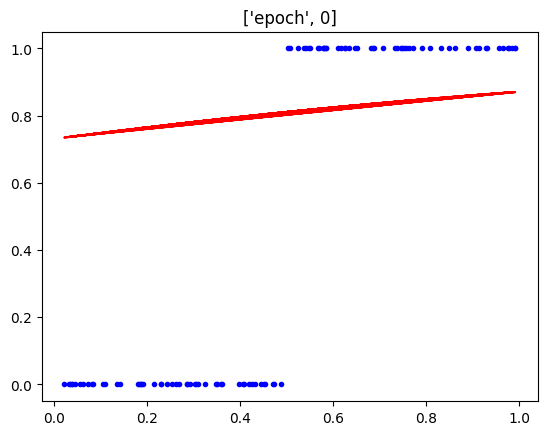

epoch is: 30, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


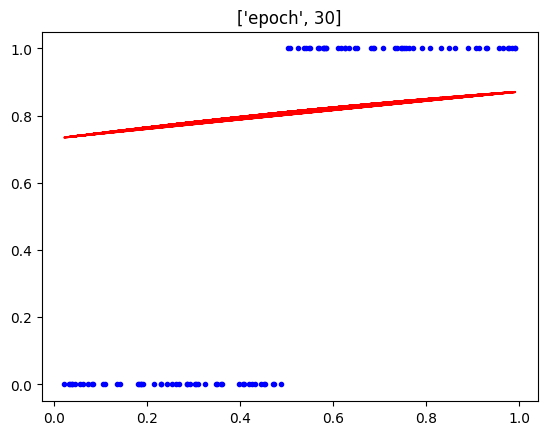

epoch is: 60, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


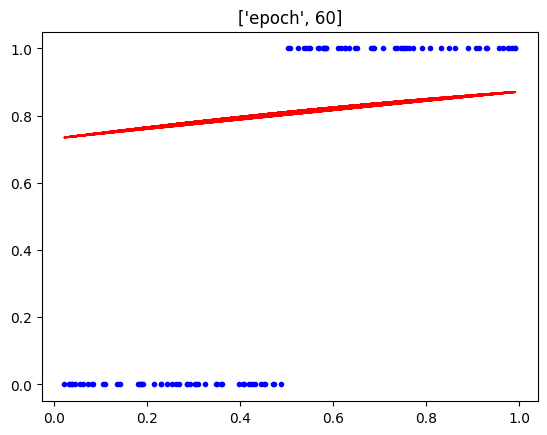

epoch is: 90, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


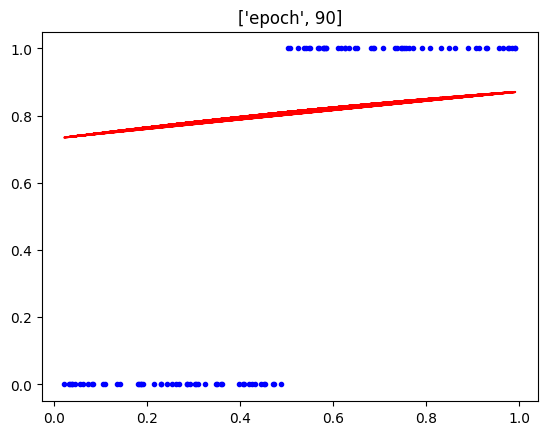

epoch is: 120, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


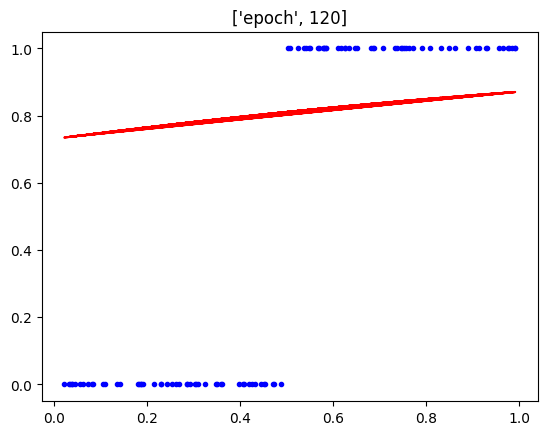

epoch is: 150, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


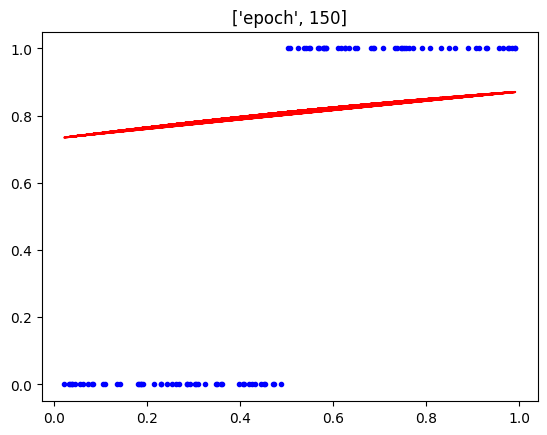

epoch is: 180, loss is 31.164457321166992,  W is: [[0.91369224]], b is [1.]


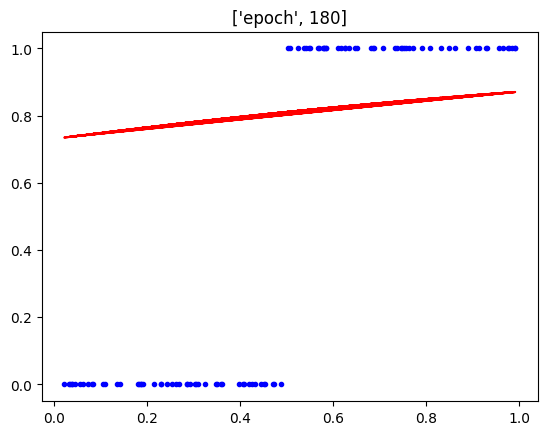

In [28]:
#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.ones(shape=(1,)))

#Optimization
## Writing training/learing loop with GradienTape
learning_rate = 0.000000001
steps = 200 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(predictions,y_train)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    if i%30 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b.')
        plt.plot(x_train, output(x_train), c='r')
        plt.show()

### Logistic Regression Model building in TensorFlow

In [1]:
# This step is for data creation
x_train= np.random.rand(100,1)
y_train=np.array([0 if i < 0.5 else 1 for i in x_train]).reshape(-1,1)

import matplotlib.pyplot as plt
plt.title("x_train vs y_train data")
plt.plot(x_train, y_train, 'b.',)
plt.show()

NameError: name 'np' is not defined

In [42]:
#Model y=sigmoid(X*W + b)
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    print(f"epoch : {i}, loss  {loss.numpy()},  W : {W.numpy()}, b  {b.numpy()}")

epoch : 0, loss  21.532512664794922,  W : [[1.1055025]], b  [-0.6651631]
epoch : 1, loss  19.14679527282715,  W : [[1.643189]], b  [-0.526035]
epoch : 2, loss  17.3753604888916,  W : [[1.8442861]], b  [-0.95790124]
epoch : 3, loss  15.929963111877441,  W : [[2.252419]], b  [-0.9088941]
epoch : 4, loss  14.758512496948242,  W : [[2.4524775]], b  [-1.2058426]
epoch : 5, loss  13.7855806350708,  W : [[2.7654243]], b  [-1.2192988]
epoch : 6, loss  12.976468086242676,  W : [[2.9624836]], b  [-1.4157377]
epoch : 7, loss  12.293476104736328,  W : [[3.207069]], b  [-1.472376]
epoch : 8, loss  11.71037483215332,  W : [[3.3963401]], b  [-1.6037883]
epoch : 9, loss  11.205805778503418,  W : [[3.5965874]], b  [-1.6796466]
epoch : 10, loss  10.763925552368164,  W : [[3.7724583]], b  [-1.7764872]
epoch : 11, loss  10.373027801513672,  W : [[3.945004]], b  [-1.8544323]
epoch : 12, loss  10.024264335632324,  W : [[4.105507]], b  [-1.9343798]
epoch : 13, loss  9.710831642150879,  W : [[4.259466]], b  [

Plotting

epoch is: 0, loss is 22.17084503173828,  W is: [[0.94125307]], b is [-0.4797511]


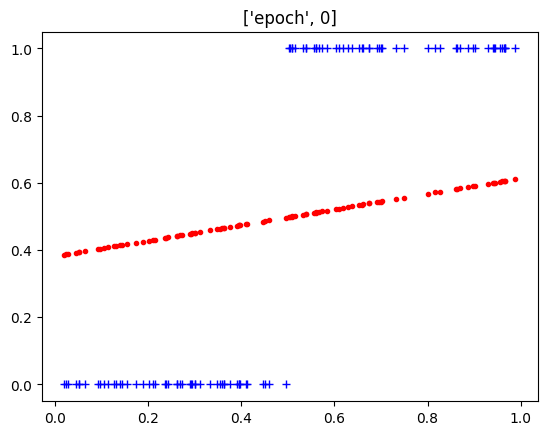

epoch is: 40, loss is 6.185737609863281,  W is: [[6.890799]], b is [-3.2561462]


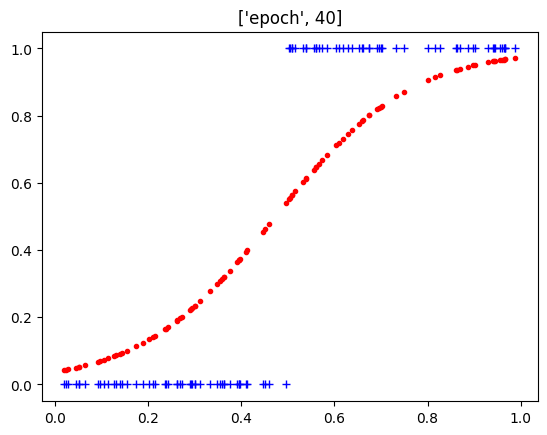

epoch is: 80, loss is 4.660723686218262,  W is: [[9.080686]], b is [-4.2899876]


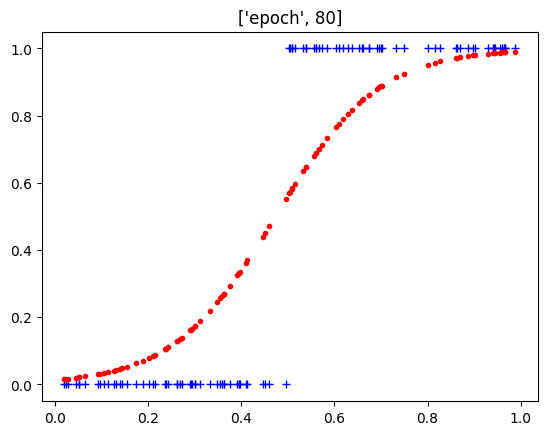

epoch is: 120, loss is 3.95670747756958,  W is: [[10.583793]], b is [-5.0019693]


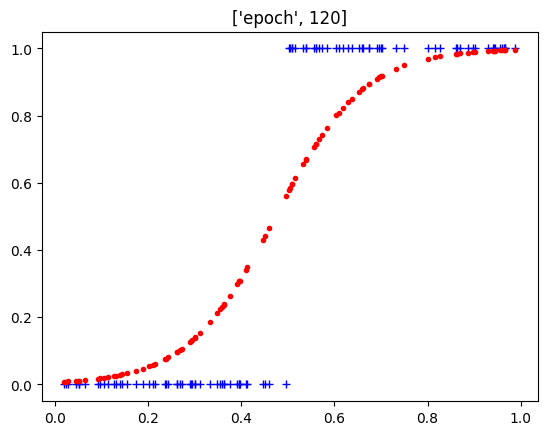

epoch is: 160, loss is 3.5259499549865723,  W is: [[11.76285]], b is [-5.561985]


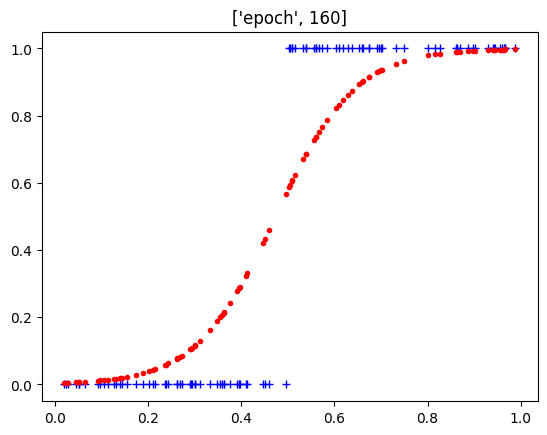

epoch is: 200, loss is 3.226516008377075,  W is: [[12.7470455]], b is [-6.0304136]


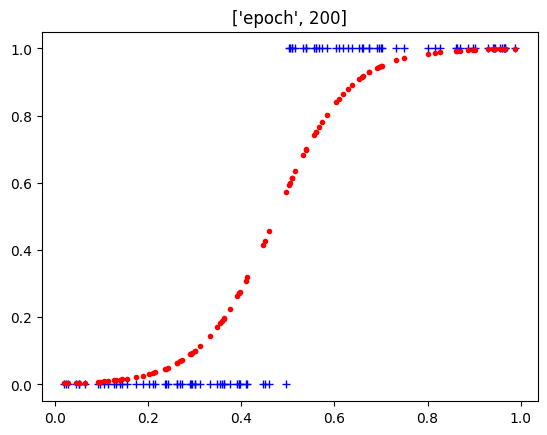

epoch is: 240, loss is 3.0023651123046875,  W is: [[13.599075]], b is [-6.436612]


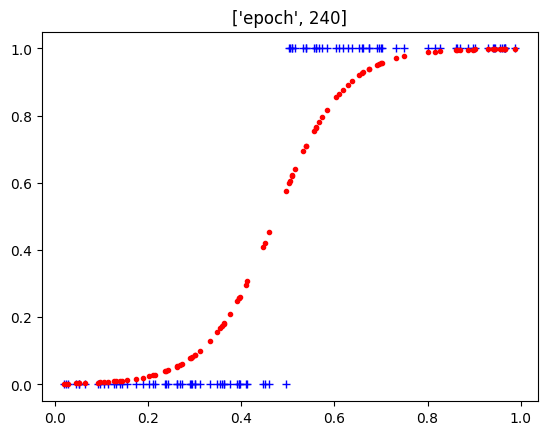

epoch is: 280, loss is 2.826202392578125,  W is: [[14.354652]], b is [-6.797336]


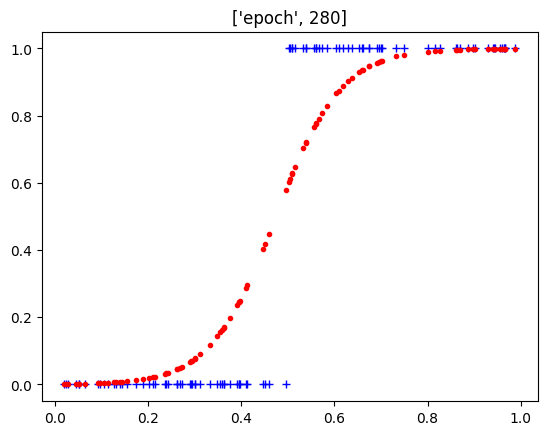

In [43]:
#Model y=X*W + b
# same as the linear regression just sigmoid wrapped around the linear equation
def output(x): 
    return tf.sigmoid(W*x + b)

#Loss function : sum of squares
def loss_function(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred - y_true))

#Initialize Weights
W = tf.Variable(tf.random.uniform(shape=(1, 1)))
b = tf.Variable(tf.zeros(shape=(1,)))

## Optimization
learning_rate = 0.1
steps = 300 #epochs

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = output(x_train)
        loss = loss_function(y_train, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)

    if i%40 == 0:
        print(f"epoch is: {i}, loss is {loss.numpy()},  W is: {W.numpy()}, b is {b.numpy()}")
        plt.title(["epoch", i])
        plt.plot(x_train, y_train, 'b+')
        plt.plot(x_train, output(x_train), '.', c='r')
        plt.show()

# Keras

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

In [ ]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [ ]:
model = keras.Sequential()
#Input Layer. The model needs to know what input shape it should expect. 
#For this reason, the first layer in a Sequential model needs to receive information about its input shape.
#Only the first need the snape information, because following layers can do automatic shape inference
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))

#The dense layer is simply a layer where each unit or neuron is connected to each neuron in the next layer.
model.add(layers.Dense(20, activation='sigmoid'))

#In the final layer mention the output classes
model.add(layers.Dense(10, activation='softmax'))

#Model Summary
model.summary()

In [ ]:
# Compiling model : we define loss function, optimizer and validation matric of our choice
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit method: actually running our model by supplying our input and validation data
model.fit(x_train, y_train,epochs=10)

In [ ]:
print(model.get_weights())

In [ ]:
loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))